# Credit Card Fraud Detection

Credit card fraud can occur when unauthorized users gain access to an individual's credit card information in order to make purchases, other transactions, or open new accounts. A few examples of credit card fraud include account takeover fraud, new account fraud, cloned cards, and cards-not-present schemes. This unauthorized access occurs through phishing, skimming, and information sharing by a user, oftentimes unknowingly. However, this type of fraud can be detected through means of artificial intelligence and machine learning as well as prevented by issuers, institutions, and individual cardholders. According to a 2021 annual report, about 50% of all Americans have experienced a fraudulent charge on their credit or debit cards, and more than one in three credit or debit card holders have experienced fraud multiple times. This amounts to 127 million people in the US that have been victims of credit card theft at least once [*](https://en.wikipedia.org/wiki/Credit_card_fraud).

This is a binary classification problem which will mark the transactions either as fraudulent or non-fraudulent based on the trained model on the [Kaggle dataset](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card).

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics to evaluate performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Dataset

In [5]:
df = pd.read_csv('Data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Summarize Data

In [3]:
df.describe(include='all').transpose() #.transpose() to see all columns

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [13]:
# Check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class       int64
dtype: object

In [6]:
# Since it's a classification problem converting class feature into object
df['class'] = df['class'].astype('object')
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class      object
dtype: object

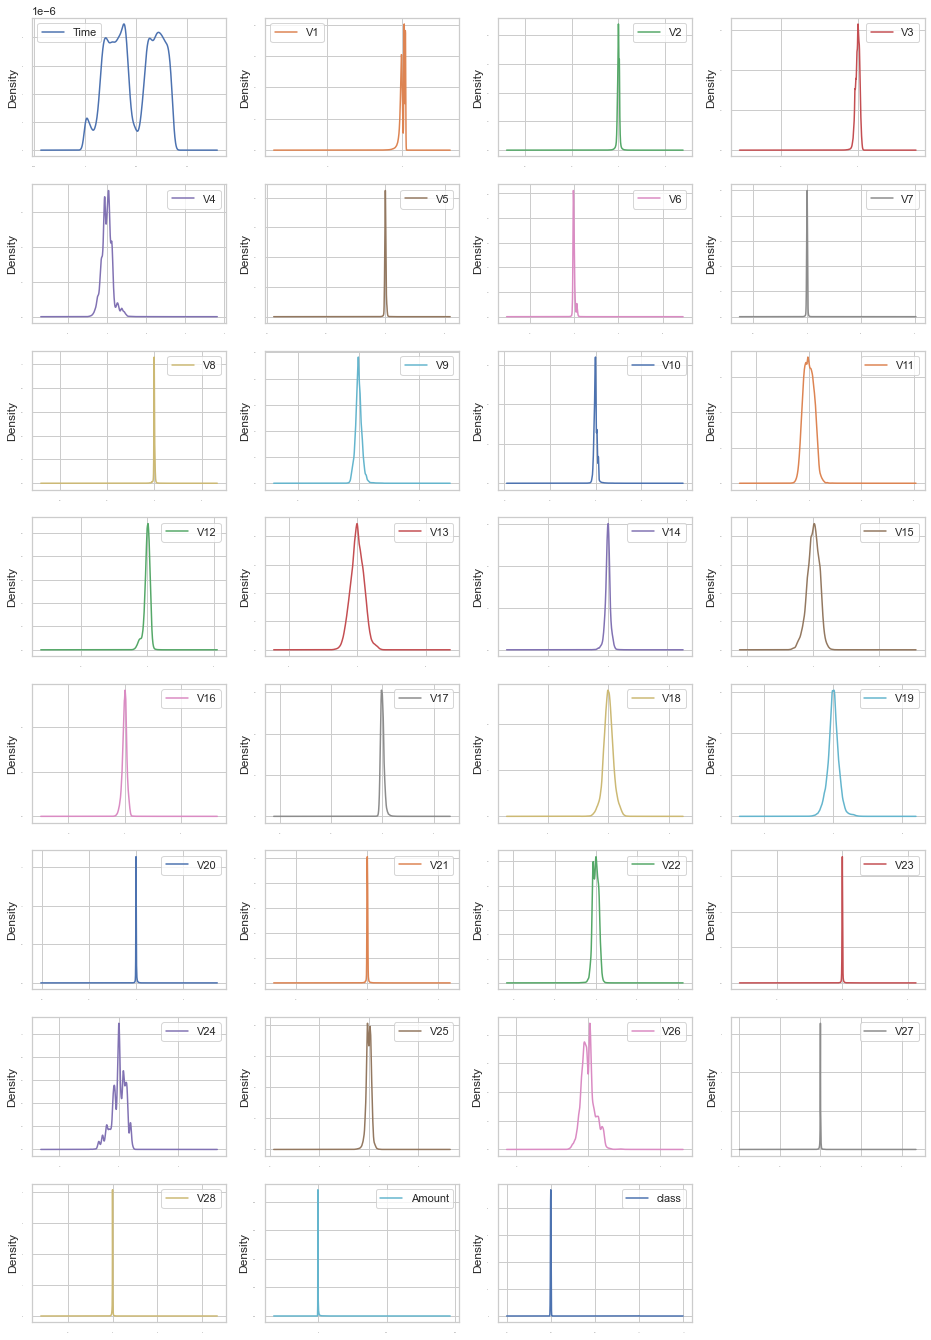

In [7]:
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()

**Observation:**

<AxesSubplot:xlabel='class', ylabel='count'>

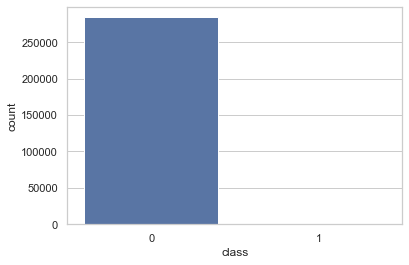

In [9]:
sb.countplot(x=df['class'])

In [11]:
print(df['class'].value_counts())

no_fradulent = (df['class'].value_counts()[0] / len(df['class'])) * 100
fradulent = (df['class'].value_counts()[1] / len(df['class'])) * 100
print('\nRatio of the transactions which are not fradulent: %.2f%%' % no_fradulant)
print('Ratio of the transactions which are fradulent: %.2f%%' % fradulant)

0    284315
1       492
Name: class, dtype: int64

Ratio of the transactions which are not fradulent: 99.83%
Ratio of the transactions which are fradulent: 0.17%


**Observation:** As can be seen from the previous 2 cells the dataset is highly imbalanced state. Even if ramdomly we say that any transaction is not fraudalent, we have **99.83%** chance that we're right. That's why we need to bring the dataset into balance either using Random undersampling or oversampling using SMOTE.

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_79784/399382268.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


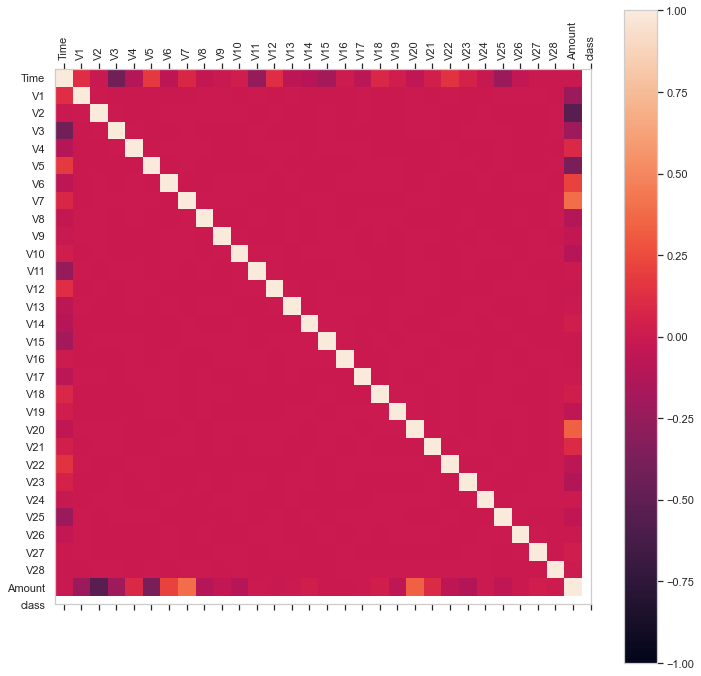

In [31]:
# Correlation
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.show()

**Observation:** 

Number of rows: 284807


## Prepare Data

In [ ]:
### Drop Suplicates

In [6]:
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('%d duplicates removed' % (nr_rows - df.shape[0]))
print('Number of rows after removal of duplicates: %d' % (df.shape[0]))

Number of rows: 284807
1081 duplicates removed
Number of rows after removal of duplicates: 283726


### Outlier Detection

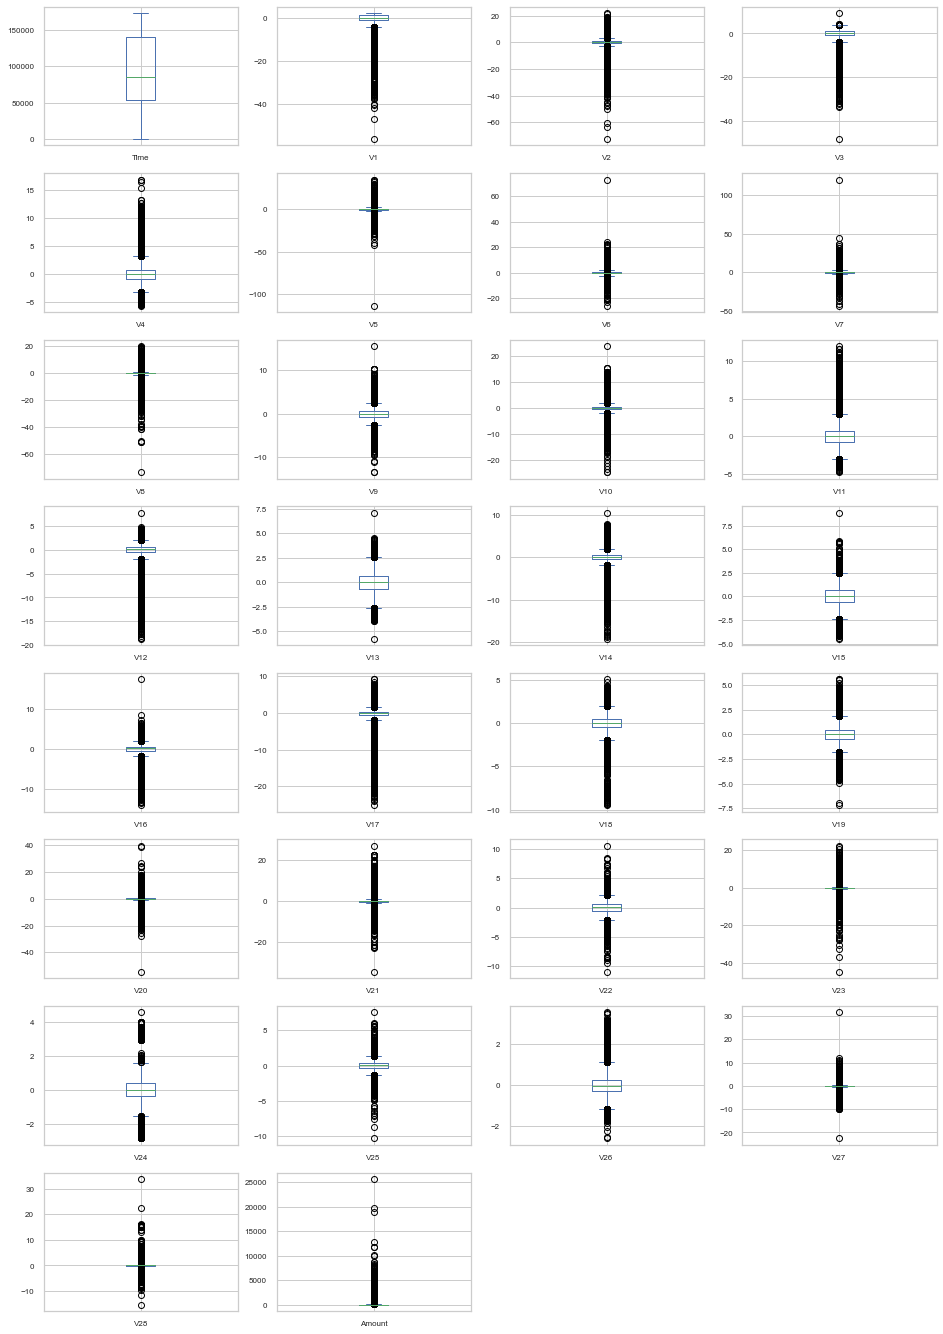

In [15]:
df.drop('class', axis=1).plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
                             legend=True, fontsize=8, figsize=(16,24))
plt.show()

**Observation:** As can be seen on the above graph most of the features have many outliers which should be handled.

In [22]:
# Detect outliers by using Interquartile Range Method (iqr)
for column in df.drop('class', axis=1).columns:
    # Calculate interquartile range
    q25 = np.percentile(df[column], 25)
    q75 = np.percentile(df[column], 75)
    iqr = q75 - q25
    print('Percentiles of %s: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (column, q25, q75, iqr))
    # Calculate the outlier cutoff value
    cut_off = iqr * 1.5
    lower_bound = q25 - cut_off
    upper_bound = q75 + cut_off
    print('%s: Lower = %.2f, Upper = %.2f' % (column, lower_bound, upper_bound))
    print('----------------------------')

Percentiles of Time: 25th=54204.750, 75th=139298.000, IQR=85093.250
Time: Lower = -73435.12, Upper = 266937.88
----------------------------
Percentiles of V1: 25th=-0.916, 75th=1.316, IQR=2.232
V1: Lower = -4.26, Upper = 4.66
----------------------------
Percentiles of V2: 25th=-0.600, 75th=0.800, IQR=1.401
V2: Lower = -2.70, Upper = 2.90
----------------------------
Percentiles of V3: 25th=-0.890, 75th=1.027, IQR=1.917
V3: Lower = -3.76, Upper = 3.90
----------------------------
Percentiles of V4: 25th=-0.850, 75th=0.740, IQR=1.590
V4: Lower = -3.23, Upper = 3.12
----------------------------
Percentiles of V5: 25th=-0.690, 75th=0.612, IQR=1.302
V5: Lower = -2.64, Upper = 2.57
----------------------------
Percentiles of V6: 25th=-0.769, 75th=0.397, IQR=1.166
V6: Lower = -2.52, Upper = 2.15
----------------------------
Percentiles of V7: 25th=-0.553, 75th=0.570, IQR=1.123
V7: Lower = -2.24, Upper = 2.25
----------------------------
Percentiles of V8: 25th=-0.209, 75th=0.326, IQR=0.535
V

In [24]:
# Remove outliers based on the lower and upper bounds detected above
# No need to apply it to the Time feature as it doesn't has any outlier

df_no_outlier = df[((df['V1'] >= -4.26) & (df['V1'] <= 4.66) & (df['V2'] >= -2.7) & (df['V2'] <= 2.9) &
                    (df['V3'] >= -3.76) & (df['V3'] <= 3.9) & (df['V4'] >= -3.23) & (df['V4'] <= 3.12) &
                    (df['V5'] >= -2.64) & (df['V5'] <= 2.57) & (df['V6'] >= -2.52) & (df['V6'] <= 2.15) &
                    (df['V7'] >= -2.24) & (df['V7'] <= 2.25) & (df['V8'] >= -1.01) & (df['V8'] <= 1.13) &
                    (df['V9'] >= -2.5) & (df['V9'] <= 2.46) & (df['V10'] >= -2.02) & (df['V10'] <= 1.94) & 
                    (df['V11'] >= -3.01) & (df['V11'] <= 2.99) & (df['V12'] >= -1.94) & (df['V12'] <= 2.15) &
                    (df['V13'] >= -2.61) & (df['V13'] <= 2.63) & (df['V14'] >= -1.8) & (df['V14'] <= 1.87) &
                    (df['V15'] >= -2.43) & (df['V15'] <= 2.5) & (df['V16'] >= -1.95) & (df['V16'] <= 2.01) &
                    (df['V17'] >= -1.81) & (df['V17'] <= 1.72) &
                    (df['V18'] >= -2) & (df['V18'] <= 2) &
                    (df['V19'] >= -1.83) & (df['V19'] <= 1.83) &
                    (df['V20'] >= -0.73) & (df['V20'] <= 0.65) &
                    (df['V21'] >= -0.85) & (df['V21'] <= 0.81) &
                    (df['V22'] >= -2.15) & (df['V22'] <= 2.13) &
                    (df['V23'] >= -0.63) & (df['V23'] <= 0.61) &
                    (df['V24'] >= -1.55) & (df['V24'] <= 1.63) &
                    (df['V25'] >= -1.32) & (df['V25'] <= 1.35) &
                    (df['V26'] >= -1.18) & (df['V26'] <= 1.09) &
                    (df['V27'] >= -0.31) & (df['V27'] <= 0.33) &
                    (df['V28'] >= -0.25) & (df['V28'] <= 0.27) &
                    (df['Amount'] >= 0) & (df['Amount'] <= 185.38))]

In [25]:
df_no_outlier.shape

(145575, 31)

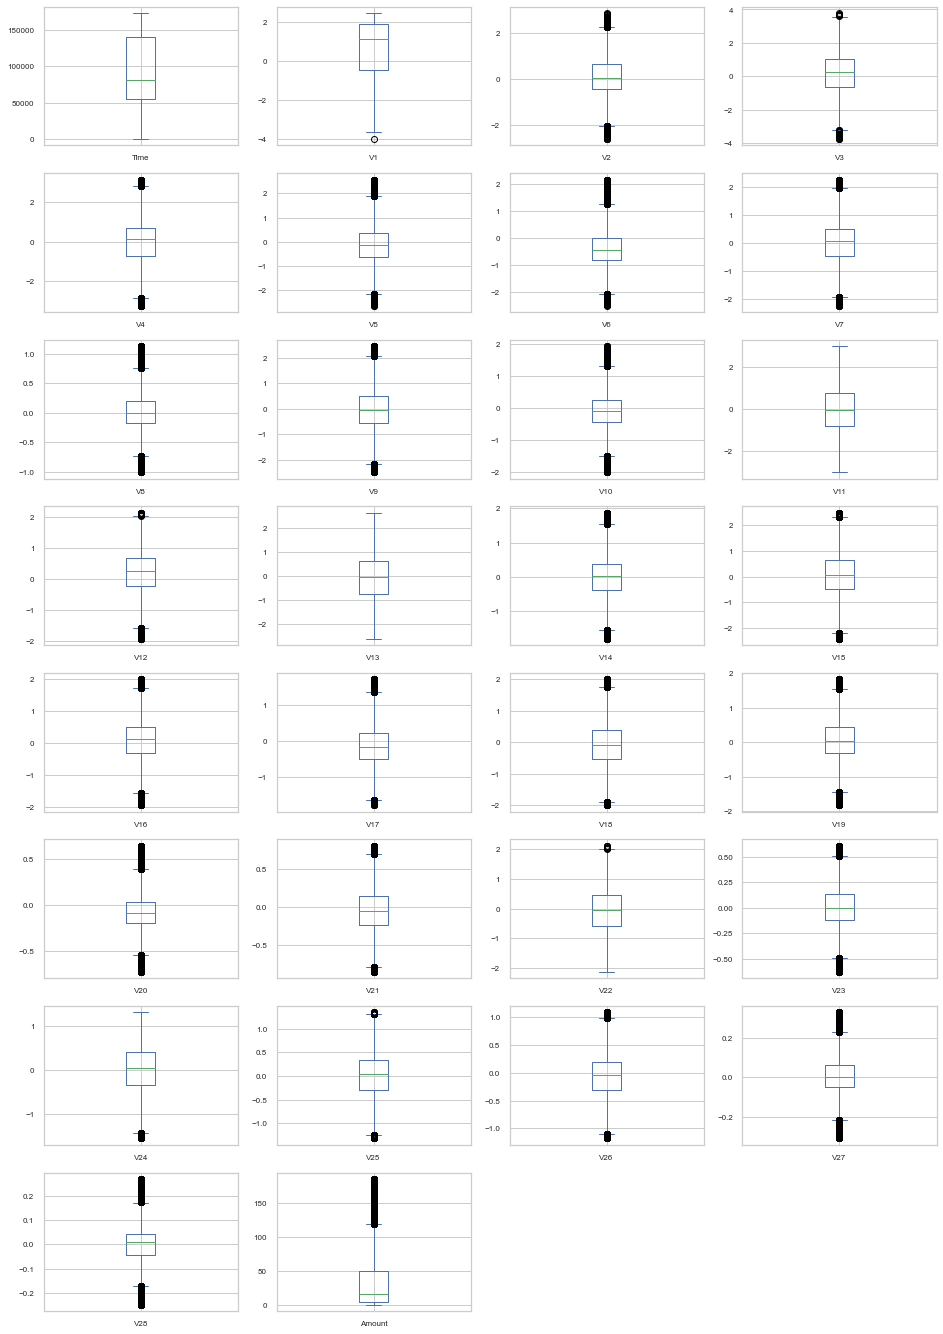

In [30]:
df_no_outlier.drop('class', axis=1).plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
                             legend=True, fontsize=8, figsize=(16,24))
plt.show()

In [28]:
df_no_outlier['class'].value_counts()

0    145560
1        15
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

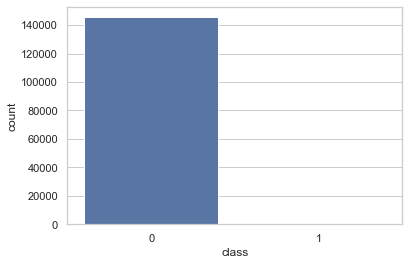

In [26]:
sb.countplot(x=df_no_outlier['class'])

### Train Test Split

In [8]:
x = df.drop('class', axis = 1)
y = df['class']

In [9]:
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

## Prepare Baseline

In [10]:
# Constants for training and evaluation options
n_fold = 10
scr = 'accuracy'

In [13]:
# Create a function that evaluates different algorithms can be used for each update on the model
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC(gamma='auto')))
    
    names = []
    results = []
    for name, model in models:
        kfold = KFold(n_splits=n_fold, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD(%.2f)' % (name, cv_results.mean()*100, cv_results.std())
        print(msg)
        
     # Plot the results
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Algorithm Comparison', fontsize=14, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR - Mean ACC: 99.89% STD(0.00)
LDA - Mean ACC: 99.94% STD(0.00)
KNN - Mean ACC: 99.83% STD(0.00)
CART - Mean ACC: 99.91% STD(0.00)
NB - Mean ACC: 99.27% STD(0.00)


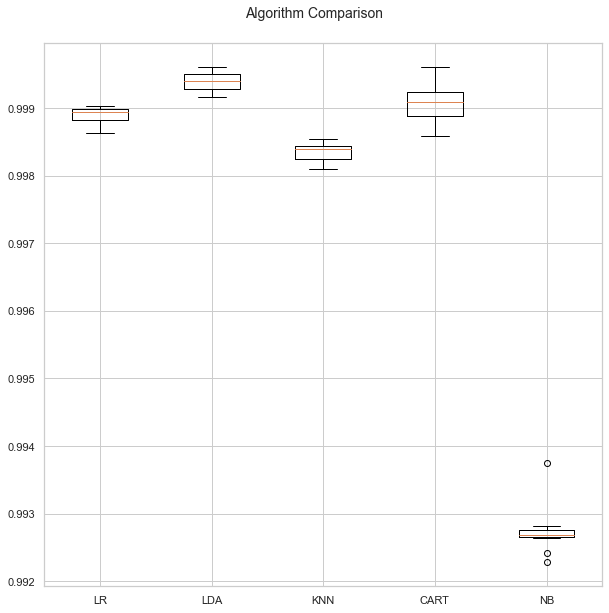

In [14]:
# Evaluating algorithms for the baseline
evaluate_algorithms(x_train, y_train)

:telescope: **Observation:** Eventhough LDA provide 99.94% accuracy, these results are <ins>deceptive</ins> due to the reason that we mentioned above while checking if the dataset is balanced. The dataset is imbalanced and it's easy to guess a transaction as non-fraudulent. That's why firts we need to use under or over sampling techniques to make the dataset balanced, then we can train the algorithms.